<a href="https://colab.research.google.com/github/ncrowder/python/blob/main/murach_data_analysis/class_demos/multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## How to make predictions with a multiple regression model

In [1]:
import pandas as pd
import seaborn as sns

## The Cars dataset

In [4]:
path = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/data/cars.csv'

In [5]:
carsData = pd.read_csv(path)

In [6]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

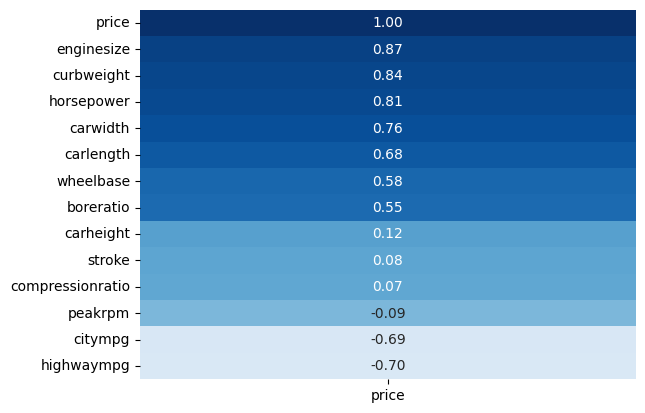

In [8]:
numeric_cols = ["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]
sns.heatmap(data=carsData[numeric_cols].corr()[["price"]].sort_values('price', ascending=False),
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

# How to create a simple regression model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7063964117029844

In [11]:
model.score(x_train, y_train)

0.766524123801206

In [12]:
y_predicted = model.predict(x_test)

In [13]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

,enginesize,price,predictedPrice
0,136,15250.0,14905.920686
1,90,8916.5,7164.387613
2,92,8778.0,7500.976007
3,203,31400.5,26181.631901
4,92,6488.0,7500.976007


## How to plot the residuals of a simple regression

In [14]:
final['residual'] = final['price'] - final['predictedPrice']
final.head(10)

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387
2,7500.976007,92,8778.0,1277.023993
3,26181.631901,203,31400.5,5218.868099
4,7500.976007,92,6488.0,-1012.976007
5,8342.446994,97,13845.0,5502.553006
6,7332.681810,91,6695.0,-637.681810
7,10193.683163,108,11694.0,1500.316837
8,12213.213530,120,15580.0,3366.786470
9,12381.507727,121,15510.0,3128.492273


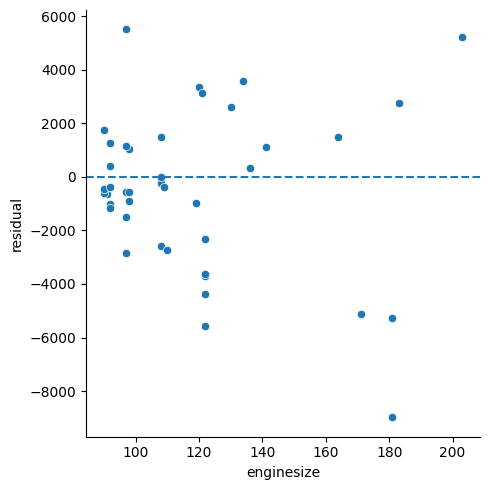

In [15]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
ax = g.axes.flatten()
ax[0].axhline(0, ls='--')

<Axes: xlabel='residual', ylabel='Density'>

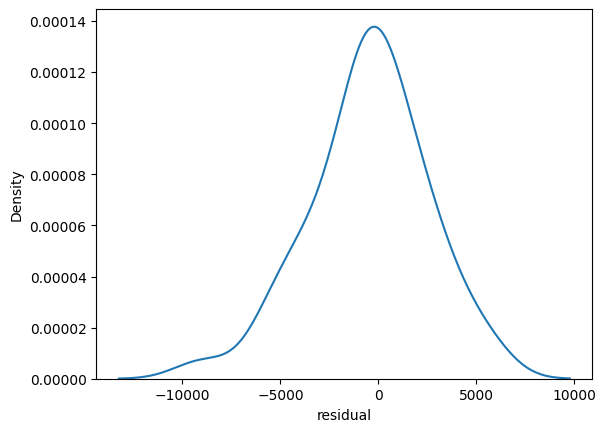

In [16]:
sns.kdeplot(data=final, x='residual')

# How to create a multiple regression model

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight']], carsData[['price']],
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7581072748679533

In [18]:
model.score(x_train, y_train)

0.7950435284247739

In [19]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [23]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final.head()#[['enginesize','curbweight','price','predictedPrice']]

,predictedPrice,enginesize,curbweight,price
0,14186.974331,136,2507,15250.0
1,5681.243299,90,1874,8916.5
2,12256.116157,92,3110,8778.0
3,26252.387995,203,3366,31400.5
4,6633.723732,92,2015,6488.0


## How to plot the residuals of a multiple regression

In [24]:
final['residual'] = final['price'] - final['predictedPrice']
final.head()

,predictedPrice,enginesize,curbweight,price,residual
0,14186.974331,136,2507,15250.0,1063.025669
1,5681.243299,90,1874,8916.5,3235.256701
2,12256.116157,92,3110,8778.0,-3478.116157
3,26252.387995,203,3366,31400.5,5148.112005
4,6633.723732,92,2015,6488.0,-145.723732


<Axes: xlabel='residual', ylabel='Density'>

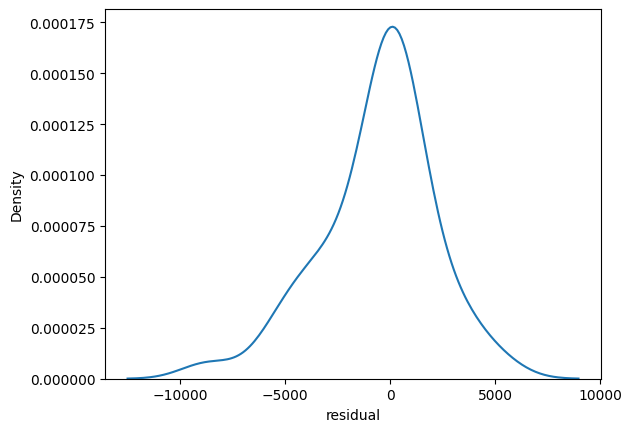

In [25]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [26]:
uniques = carsData.nunique().rename("unique values")
uniques

,unique values
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


## How to review categorical variables

### Dichotomous (Binary) variables

In [27]:
binary_vars = uniques[uniques==2]
binary_vars

,unique values
fueltype,2
aspiration,2
doornumber,2
enginelocation,2


In [28]:
for var in binary_vars.index:
  print(carsData[var].value_counts(),"\n")

fueltype
gas       185
diesel     20
Name: count, dtype: int64 

aspiration
std      168
turbo     37
Name: count, dtype: int64 

doornumber
four    115
two      90
Name: count, dtype: int64 

enginelocation
front    202
rear       3
Name: count, dtype: int64 



### Nominal variables

In [ ]:
# I changed this part slightly from the way it was done in the lecture

In [54]:
uniques.sort_values().head(12)

,unique values
fueltype,2
aspiration,2
doornumber,2
enginelocation,2
drivewheel,3
carbody,5
symboling,6
cylindernumber,7
enginetype,7
fuelsystem,8


In [66]:
cols_to_inspect = uniques[uniques<=8].index #looking at columns with 8 or fewer unique values
cols_to_inspect

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [67]:
value_counts = carsData[cols_to_inspect].melt(var_name = 'column', value_name = 'value').value_counts().rename('count')

In [69]:
value_counts.sort_values().sort_index(level=0,sort_remaining=False)

column          value      
aspiration      turbo           37
                std            168
carbody         convertible      6
                hardtop          8
                wagon           25
                hatchback       70
                sedan           96
cylindernumber  twelve           1
                three            1
                two              4
                eight            5
                five            11
                six             24
                four           159
doornumber      two             90
                four           115
drivewheel      4wd              9
                rwd             76
                fwd            120
enginelocation  rear             3
                front          202
enginetype      dohcv            1
                rotor            4
                dohc            12
                l               12
                ohcv            13
                ohcf            15
                ohc            148
fuelsystem      spfi             1
                mfi              1
                4bbl             3
                spdi             9
                1bbl            11
                idi             20
                2bbl            66
                mpfi            94
fueltype        diesel          20
                gas            185
symboling       -2               3
                -1              22
                3               27
                2               32
                1               54
                0               67
Name: count, dtype: int64

## How to create dummy variables

In [70]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    bool 
 1   aspiration_turbo     205 non-null    bool 
 2   doornumber_four      205 non-null    bool 
 3   doornumber_two       205 non-null    bool 
 4   carbody_convertible  205 non-null    bool 
 5   carbody_hardtop      205 non-null    bool 
 6   carbody_hatchback    205 non-null    bool 
 7   carbody_sedan        205 non-null    bool 
 8   carbody_wagon        205 non-null    bool 
 9   drivewheel_4wd       205 non-null    bool 
 10  drivewheel_fwd       205 non-null    bool 
 11  drivewheel_rwd       205 non-null    bool 
dtypes: bool(12)
memory usage: 2.5 KB


In [71]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

## How to rescale the data and check the correlations

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,True,True,False,False,False,False,False,False,True
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,True,True,False,False,False,False,False,False,True
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,False,True,False,False,True,False,False,False,False,True
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,...,True,False,False,False,False,True,False,False,True,False
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,...,True,False,False,False,False,True,False,True,False,False


In [80]:
dummyCols = list(dummies.columns)
dummyCols

['aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd']

In [81]:
numCols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [82]:
Cols = dummyCols + numCols

In [83]:
Cols

['aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [84]:
Cols.append("price")
carsDummies[Cols].corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173
carbody_hardtop,0.225854


## How to create a multiple regression that includes dummy variables

In [90]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2,
    random_state=20)

In [91]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])

model.score(carsTest[xCols], carsTest['price'])

0.7523820020019687

In [92]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8334860355280258

In [93]:
y_predicted = model.predict(carsTest[xCols])

In [97]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])
final.head()
#This next line just puts the predicted price at the end, but there is a slicker way to do it that I'm now using below in the next cell.
#final[['enginesize','horsepower','carwidth','drivewheel_rwd','highwaympg','price','predictedPrice']].head()

,predictedPrice,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price
0,13517.858822,0.218885,0.149133,0.183272,False,-0.837195,15250.0
1,5968.304606,-0.888455,-0.864871,-1.078431,False,1.783034,8916.5
2,4984.725918,-0.840310,-1.067671,-1.078431,False,0.181783,8778.0
3,37778.843127,1.831749,4.661448,2.987056,True,-0.400490,31400.5
4,5347.966676,-0.840310,-1.067671,-1.078431,False,1.055193,6488.0


In [98]:
name = final.columns[0] #the predicted price column
final[name] = final.pop(name) #pop removes it and then it gets reassigned to a new column which goes at the end.
final

,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,0.183272,False,-0.837195,15250.0,13517.858822
1,-0.888455,-0.864871,-1.078431,False,1.783034,8916.5,5968.304606
2,-0.840310,-1.067671,-1.078431,False,0.181783,8778.0,4984.725918
3,1.831749,4.661448,2.987056,True,-0.400490,31400.5,37778.843127
4,-0.840310,-1.067671,-1.078431,False,1.055193,6488.0,5347.966676
5,-0.719947,-0.915571,0.463650,False,1.055193,13845.0,8926.310250
6,-0.864383,-0.915571,-0.798053,False,1.055193,6695.0,6135.395101
7,-0.455148,0.174483,-0.237296,False,-1.128332,11694.0,10312.188132
8,-0.166277,-0.231119,1.164596,True,-0.982764,15580.0,15397.832249
9,-0.142204,0.149133,0.276731,False,-0.400490,15510.0,12590.292979


## How to select the independent variables

<Axes: >

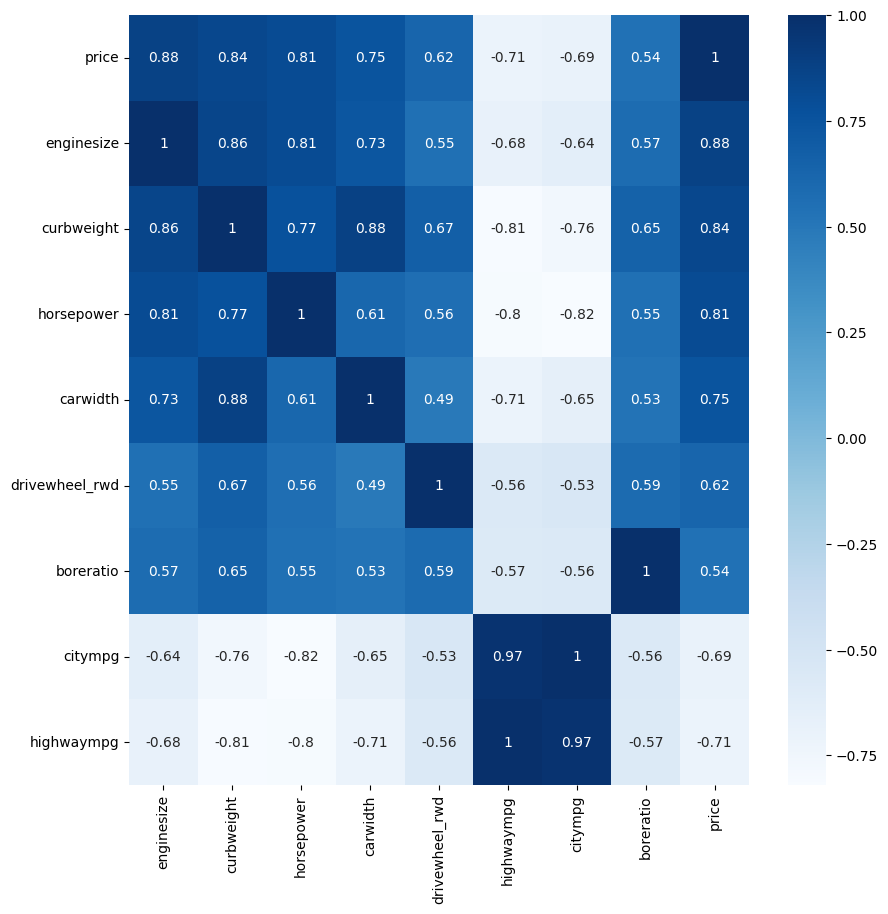

In [99]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].corr().sort_values(by='price', ascending=False),
            cmap='Blues', annot=True)

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [100]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7392437314293405

In [101]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8344434015448825

In [102]:
model.coef_

array([3726.72411263,   32.04409677, 2070.90478318, 2083.96786581,
       -424.56257491, 2570.2343958 , 1189.54573428, -983.65032709])

### The initial model without the citympg column

In [103]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])
#Because citympg is highly correlated with highwaympg we can essentially drop it and not lose any

0.743094490364766

In [106]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

In [107]:
model.coef_

array([3634.21109851, -126.82985457, 2315.76639178, 2055.52387197,
       -310.80192446, 2570.57749107,  285.02527903])

### A model that's fitted to all the numeric and dummy variables

In [108]:
model = LinearRegression()
xCols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','aspiration_std','aspiration_turbo','doornumber_four','doornumber_two','carbody_convertible','carbody_hardtop','carbody_hatchback','carbody_sedan','carbody_wagon',
 'drivewheel_4wd','drivewheel_fwd','drivewheel_rwd']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.773712283561883

In [109]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8778455360116013

## How to use SciKit learn to select the variables

In [110]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [111]:
carsDummies

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,True,True,False,False,False,False,False,False,True
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,True,True,False,False,False,False,False,False,True
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,False,True,False,False,True,False,False,False,False,True
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,...,True,False,False,False,False,True,False,False,True,False
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,front,1.721873,1.198549,1.398245,0.728239,0.763241,...,True,False,False,False,False,True,False,False,False,True
201,202,-1,volvo 144ea,gas,front,1.721873,1.198549,1.351515,0.728239,0.949992,...,True,False,False,False,False,True,False,False,False,True
202,203,-1,volvo 244dl,gas,front,1.721873,1.198549,1.398245,0.728239,0.878757,...,True,False,False,False,False,True,False,False,False,True
203,204,-1,volvo 246,diesel,front,1.721873,1.198549,1.398245,0.728239,1.273437,...,True,False,False,False,False,True,False,False,False,True


In [112]:
carsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    float64
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    float64
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

In [114]:
cols_to_drop = carsDummies.select_dtypes(include=['int64', 'object']).columns.tolist() #car_ID and symboling were left in during lecture
cols_to_drop

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [115]:
# drop the non_numeric and unuseful columns and split again
carsTrain, carsTest = train_test_split(carsDummies.drop(columns=cols_to_drop), test_size=0.2, random_state=20)

In [116]:
carsTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 91 to 99
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wheelbase            164 non-null    float64
 1   carlength            164 non-null    float64
 2   carwidth             164 non-null    float64
 3   carheight            164 non-null    float64
 4   curbweight           164 non-null    float64
 5   enginesize           164 non-null    float64
 6   boreratio            164 non-null    float64
 7   stroke               164 non-null    float64
 8   compressionratio     164 non-null    float64
 9   horsepower           164 non-null    float64
 10  peakrpm              164 non-null    float64
 11  citympg              164 non-null    float64
 12  highwaympg           164 non-null    float64
 13  price                164 non-null    float64
 14  aspiration_std       164 non-null    bool   
 15  aspiration_turbo     164 non-null    bool   


In [117]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x7a5e3b191620>)

In [118]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [119]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.7661705829423802

In [120]:
model.score(x_train_fs, carsTrain['price'])

0.8682095508321264

In [124]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])  #create a DF with a feature column containing the prior column names after dropping price
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head(10)

,feature,importance
4,curbweight,0.902595
9,horsepower,0.887418
12,highwaympg,0.873249
5,enginesize,0.854740
11,citympg,0.742775
2,carwidth,0.663357
0,wheelbase,0.581751
1,carlength,0.563156
6,boreratio,0.403849
7,stroke,0.340140


## How to select the right number of variables

<Axes: xlabel='numFeatures'>

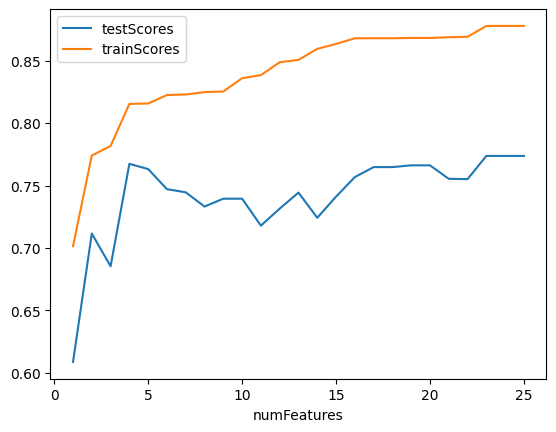

In [125]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])

    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)

df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df = df.reset_index()
df = df.rename(columns={'index':'numFeatures'})
df['numFeatures'] = df['numFeatures'] + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])

<Axes: xlabel='numFeatures'>

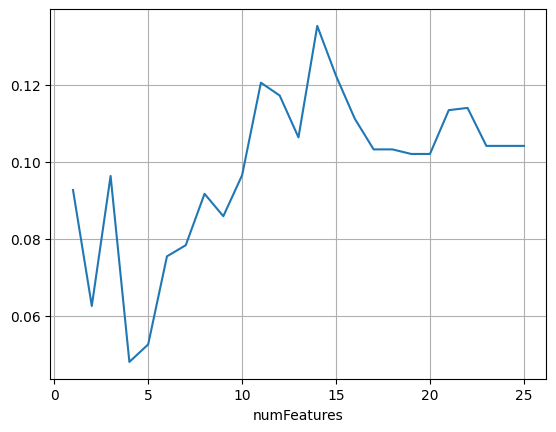

In [129]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = df['trainScores'] - df['testScores']
df.plot(x='numFeatures', y=['gap'],grid=True,legend=False)

In [127]:
df.sort_values(by='gap').head(1) #numFeatures = 4

,numFeatures,testScores,trainScores,gap
3,4,0.767383,0.815386,0.048002


In [133]:
df.set_index('numFeatures')['gap'].idxmin() #numFeatures = 4

np.int64(4)

### Retraining with only the top 4!

In [135]:
fs = SelectKBest(score_func=mutual_info_regression, k=4)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.7673830844414402

In [137]:
#Following is another way to pull out the 4 top columns that the model picked rather than looking back at the importance and feature df above.
selected_features = carsTrain.drop(columns=['price']).columns[fs.get_support()] #fs.get_support() is a boolean mask with True where it matches a column that has been kept
selected_features = list(selected_features)
selected_features

['curbweight', 'enginesize', 'horsepower', 'highwaympg']

In [ ]:
y_predicted = model.predict(carsTest[selected_features])